In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import cv2

## Using Python Image Library

In [2]:
new_width = 120
new_height = 120

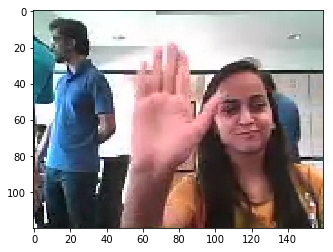

In [3]:
img = Image.open('images/sample_160_120.png')
plt.imshow(img)

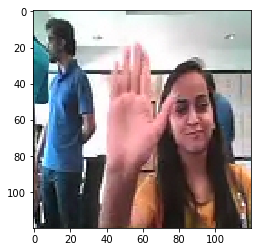

In [4]:
img = img.resize((new_width, new_height), Image.ANTIALIAS)
plt.imshow(img)

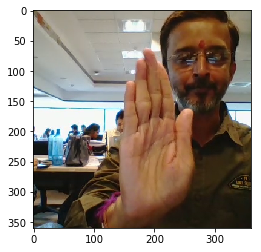

In [5]:
img = Image.open('images/sample_360_360.png')
plt.imshow(img)

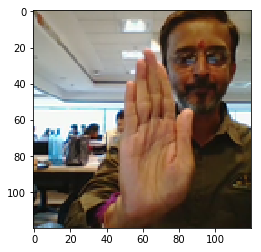

In [6]:
img = img.resize((new_width, new_height), Image.ANTIALIAS)
plt.imshow(img)

## Using Open CV

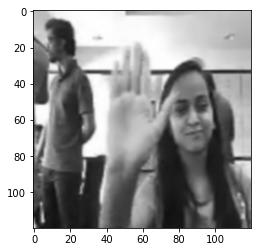

In [7]:
img = cv2.imread('images/sample_160_120.png',cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img,(new_width, new_height),interpolation=cv2.INTER_AREA)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')

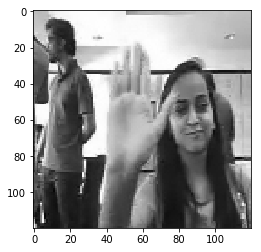

In [8]:
plt.imshow(img, cmap = 'gray')

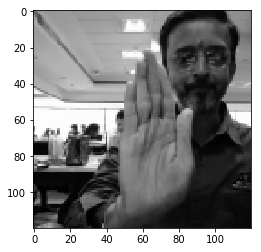

In [9]:
img = cv2.imread('images/sample_360_360.png',cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img,(new_width, new_height),interpolation=cv2.INTER_AREA)
plt.imshow(img, cmap = 'gray')

In [14]:
cap = cv2.VideoCapture(0)
 
_, first_frame = cap.read()
first_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
first_gray = cv2.GaussianBlur(first_gray, (5, 5), 0)
 
while True:
    _, frame = cap.read()
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray_frame = cv2.GaussianBlur(gray_frame, (5, 5), 0)
 
    difference = cv2.absdiff(first_gray, gray_frame)
    _, difference = cv2.threshold(difference, 25, 255, cv2.THRESH_BINARY)
 
    cv2.imshow("First frame", first_frame)
    cv2.imshow("Frame", frame)
    cv2.imshow("difference", difference)
 
    key = cv2.waitKey(30)
    if key == 27:
        break
 
cap.release()
cv2.destroyAllWindows()

In [11]:
cap = cv2.VideoCapture(0)
#cap = cv2.VideoCapture("people-walking.mp4")
fgbg = cv2.createBackgroundSubtractorMOG2()

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Display the resulting frame
    fgmask = fgbg.apply(frame)
 
    cv2.imshow('frame',frame)
    cv2.imshow('fgmask',fgmask)
    
    key = cv2.waitKey(30)
    if key == 27:
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [12]:
cap = cv2.VideoCapture(0) 
subtractor = cv2.createBackgroundSubtractorMOG2(history=20, varThreshold=25, detectShadows=True)
 
while True:
    _, frame = cap.read()
 
    mask = subtractor.apply(frame)
 
    cv2.imshow("Frame", frame)
    cv2.imshow("mask", mask)
 
    key = cv2.waitKey(30)
    if key == 27:
        break
 
cap.release()
cv2.destroyAllWindows()

In [13]:
# Pyhton program to implement  
# WebCam Motion Detector 
  
# importing time and Pandas library 
import time, pandas 
# importing datetime class from datetime library 
from datetime import datetime 
  
# Assigning our static_back to None 
static_back = None
  
# List when any moving object appear 
motion_list = [ None, None ] 
  
# Time of movement 
time = [] 
  
# Initializing DataFrame, one column is start  
# time and other column is end time 
df = pandas.DataFrame(columns = ["Start", "End"]) 
  
# Capturing video 
video = cv2.VideoCapture(0) 
  
# Infinite while loop to treat stack of image as video 
while True: 
    # Reading frame(image) from video 
    check, frame = video.read() 
  
    # Initializing motion = 0(no motion) 
    motion = 0
  
    # Converting color image to gray_scale image 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
  
    # Converting gray scale image to GaussianBlur  
    # so that change can be find easily 
    gray = cv2.GaussianBlur(gray, (21, 21), 0) 
  
    # In first iteration we assign the value  
    # of static_back to our first frame 
    if static_back is None: 
        static_back = gray 
        continue
  
    # Difference between static background  
    # and current frame(which is GaussianBlur) 
    diff_frame = cv2.absdiff(static_back, gray) 
  
    # If change in between static background and 
    # current frame is greater than 30 it will show white color(255) 
    thresh_frame = cv2.threshold(diff_frame, 30, 255, cv2.THRESH_BINARY)[1] 
    thresh_frame = cv2.dilate(thresh_frame, None, iterations = 2) 
  
    # Finding contour of moving object 
    (_, cnts, _) = cv2.findContours(thresh_frame.copy(),  
                       cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
  
    for contour in cnts: 
        if cv2.contourArea(contour) < 10000: 
            continue
        motion = 1
  
        (x, y, w, h) = cv2.boundingRect(contour) 
        # making green rectangle arround the moving object 
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 3) 
  
    # Appending status of motion 
    motion_list.append(motion) 
  
    motion_list = motion_list[-2:] 
  
    # Appending Start time of motion 
    if motion_list[-1] == 1 and motion_list[-2] == 0: 
        time.append(datetime.now()) 
  
    # Appending End time of motion 
    if motion_list[-1] == 0 and motion_list[-2] == 1: 
        time.append(datetime.now()) 
  
    # Displaying image in gray_scale 
    cv2.imshow("Gray Frame", gray) 
  
    # Displaying the difference in currentframe to 
    # the staticframe(very first_frame) 
    cv2.imshow("Difference Frame", diff_frame) 
  
    # Displaying the black and white image in which if 
    # intencity difference greater than 30 it will appear white 
    cv2.imshow("Threshold Frame", thresh_frame) 
  
    # Displaying color frame with contour of motion of object 
    cv2.imshow("Color Frame", frame) 
  
    key = cv2.waitKey(30)
    if key == 27:
        # if something is movingthen it append the end time of movement 
        if motion == 1: 
            time.append(datetime.now()) 
        break
  
# Appending time of motion in DataFrame 
for i in range(0, len(time), 2): 
    df = df.append({"Start":time[i], "End":time[i + 1]}, ignore_index = True) 
  
# Creating a csv file in which time of movements will be saved 
df.to_csv("Time_of_movements.csv") 
  
video.release() 
  
# Destroying all the windows 
cv2.destroyAllWindows() 